# 3,5,7 Layers CNN on MNIST dataset

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Number of X_train points :", X_train.shape)
print("Number of y_train points :", y_train.shape)
print("Number of X_test points :", X_test.shape)
print("Number of y_test points :", y_test.shape)

Number of X_train points : (60000, 28, 28)
Number of y_train points : (60000,)
Number of X_test points : (10000, 28, 28)
Number of y_test points : (10000,)


In [3]:
#Initialization
batch_size = 128
num_classes = 10
epochs = 15

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols) 
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) # 1 here is every row in matrix is converted to column 
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = keras.utils.to_categorical(y_train, 10) 
Y_test = keras.utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 3 layer CNN

In [5]:
from keras.layers.normalization import BatchNormalization
#Activation=ReLU
#Optimizer=Adam
#Architecture= conv2d,maxpool,conv2d,maxpool,conv2d,bn,maxpool,fc,dropout,sm

model_3l = Sequential()
# first layer
model_3l.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model_3l.add(MaxPooling2D(pool_size=(2, 2))) 
# second layer
model_3l.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_3l.add(MaxPooling2D(pool_size=(2, 2))) 
# third layer
model_3l.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_3l.add(BatchNormalization(axis=1))
model_3l.add(MaxPooling2D(pool_size=(2, 2))) 
# flattening,dropout
model_3l.add(Flatten())
model_3l.add(Dense(128, activation='relu'))
model_3l.add(Dropout(0.5))
# softmax
model_3l.add(Dense(num_classes, activation='softmax'))
model_3l.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 3, 64)          12        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0

In [6]:
model_3l.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history=model_3l.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3624 - accuracy: 0.8861 - val_loss: 0.1073 - val_accuracy: 0.9778
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0907 - accuracy: 0.9735 - val_loss: 0.0565 - val_accuracy: 0.9845
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0657 - accuracy: 0.9811 - val_loss: 0.0579 - val_accuracy: 0.9834
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0529 - accuracy: 0.9848 - val_loss: 0.0582 - val_accuracy: 0.9831
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0470 - val_accuracy: 0.9866
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0367 - accuracy: 0.9892 - val_loss: 0.0462 - val_accuracy: 0.9880
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0438 - val_accuracy: 0.9883
Epoch 

In [7]:
#plotting function
%matplotlib notebook  
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.047884970903396606
Test accuracy: 0.9900000095367432


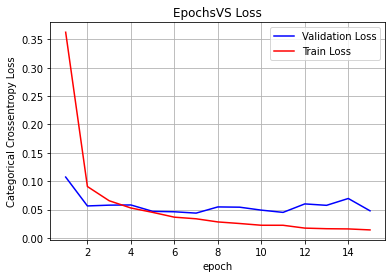

In [8]:
score = model_3l.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_title('EpochsVS Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 5 layer CNN

In [9]:
#Architecture = Conv2d,pool,conv2d,d,pool,conv2d,bn,pool,conv2d,bn,pool,conv2d,pool
model_5l = Sequential()
# first layer
model_5l.add(Conv2D(64, kernel_size=(2, 2),activation='relu',input_shape=input_shape))
model_5l.add(MaxPooling2D(pool_size=(1, 1))) 
# second layer
model_5l.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model_5l.add(Dropout(0.25))
model_5l.add(MaxPooling2D(pool_size=(2, 2))) 
# third layer
model_5l.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_5l.add(BatchNormalization(axis=1))
model_5l.add(MaxPooling2D(pool_size=(1, 1)))
# fourth layer
model_5l.add(Conv2D(32, kernel_size=(2, 2), activation='relu'))
model_5l.add(BatchNormalization(axis=1))
model_5l.add(MaxPooling2D(pool_size=(2, 2))) 
# fifth layer
model_5l.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
model_5l.add(MaxPooling2D(pool_size=(2, 2))) 
# flattening,dropout
model_5l.add(Flatten())
model_5l.add(Dense(128, activation='relu'))
model_5l.add(Dropout(0.5))
# softmax
model_5l.add(Dense(num_classes, activation='softmax'))
model_5l.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)       

In [10]:
model_5l.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history=model_5l.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))

Epoch 1/15
469/469 [==============================] - 5s 11ms/step - loss: 0.4308 - accuracy: 0.8625 - val_loss: 0.1241 - val_accuracy: 0.9687
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.1072 - accuracy: 0.9684 - val_loss: 0.0548 - val_accuracy: 0.9838
Epoch 3/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.0410 - val_accuracy: 0.9868
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.0479 - val_accuracy: 0.9847
Epoch 5/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0537 - accuracy: 0.9845 - val_loss: 0.0351 - val_accuracy: 0.9884
Epoch 6/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0483 - accuracy: 0.9857 - val_loss: 0.0262 - val_accuracy: 0.9908
Epoch 7/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0427 - accuracy: 0.9871 - val_loss: 0.0288 - val_accuracy: 0.9909

Test score: 0.026484984904527664
Test accuracy: 0.9919999837875366


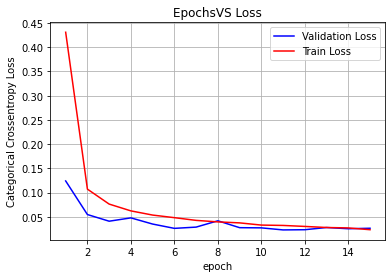

In [11]:
score = model_5l.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_title('EpochsVS Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## 7 layer CNN

In [12]:
#Architecture=conv2d,pool,conv2d,bn,pool,conv2d,d,pool,conv2d,d,pool,conv2d,bn,pool,conv2d,bn,pool,conv2d,pool
model_7l = Sequential()
# first layer
model_7l.add(Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model_7l.add(MaxPooling2D(pool_size=(1, 1))) 
# second layer
model_7l.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_7l.add(BatchNormalization(axis=1))
model_7l.add(MaxPooling2D(pool_size=(2, 2))) 
# third layer
model_7l.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_7l.add(Dropout(0.5))
model_7l.add(MaxPooling2D(pool_size=(1, 1)))
# fourth layer
model_7l.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_7l.add(Dropout(0.25))
model_7l.add(MaxPooling2D(pool_size=(1, 1))) 
# fifth layer
model_7l.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
model_7l.add(BatchNormalization(axis=1))
model_7l.add(MaxPooling2D(pool_size=(1, 1))) 
# sixth layer
model_7l.add(Conv2D(16, kernel_size=(2, 2), activation='relu'))
model_7l.add(BatchNormalization(axis=1))
model_7l.add(MaxPooling2D(pool_size=(1, 1))) 
# seventh layer 
model_7l.add(Conv2D(8, kernel_size=(3, 3), activation='relu'))
model_7l.add(MaxPooling2D(pool_size=(1, 1))) 
# flattening,dropout
model_7l.add(Flatten())
model_7l.add(Dense(128, activation='relu'))
model_7l.add(Dropout(0.5))
# softmax
model_7l.add(Dense(num_classes, activation='softmax'))
model_7l.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 64)        88        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 9, 32)         

In [13]:
model_7l.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history=model_7l.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))

Epoch 1/15
469/469 [==============================] - 6s 12ms/step - loss: 0.5877 - accuracy: 0.8027 - val_loss: 0.2421 - val_accuracy: 0.9279
Epoch 2/15
469/469 [==============================] - 5s 12ms/step - loss: 0.1203 - accuracy: 0.9651 - val_loss: 0.0486 - val_accuracy: 0.9842
Epoch 3/15
469/469 [==============================] - 5s 12ms/step - loss: 0.0888 - accuracy: 0.9741 - val_loss: 0.0422 - val_accuracy: 0.9865
Epoch 4/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0748 - accuracy: 0.9788 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 5/15
469/469 [==============================] - 5s 12ms/step - loss: 0.0676 - accuracy: 0.9810 - val_loss: 0.0366 - val_accuracy: 0.9893
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0383 - val_accuracy: 0.9898
Epoch 7/15
469/469 [==============================] - 5s 12ms/step - loss: 0.0583 - accuracy: 0.9834 - val_loss: 0.0329 - val_accuracy: 0.9905

Test score: 0.027606463059782982
Test accuracy: 0.9926999807357788


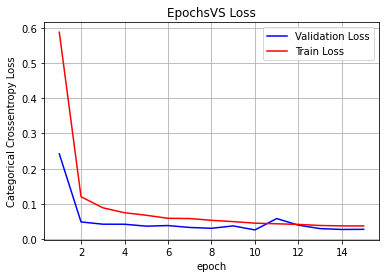

In [14]:
score = model_7l.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


fig,ax = plt.subplots(1,1)
ax.set_title('EpochsVS Loss')
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [16]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["No. of layer", "Accuracy %"]

x.add_row(["3","99.00"])
x.add_row(["5","99.19"])
x.add_row(["7","99.26"])
print(x)

+--------------+------------+
| No. of layer | Accuracy % |
+--------------+------------+
|      3       |   99.00    |
|      5       |   99.19    |
|      7       |   99.26    |
+--------------+------------+


# Summary

1 created 3,5,7 layered cnn using batch normalization   
2 observed that as layer increases accuracy also increased